In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['labels','message'])
dataset.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
dataset.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset['labels'] = dataset['labels'].map({'ham':0, 'spam':1})
dataset.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


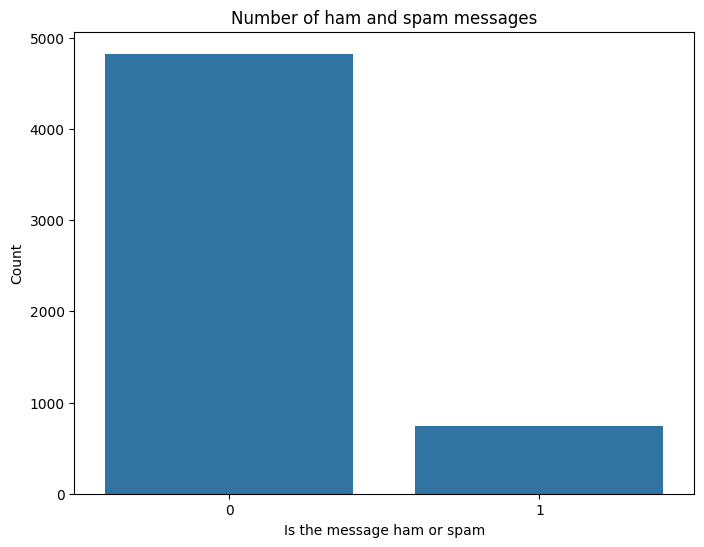

In [8]:
# Count Plot for Ham vs Spam as Inbalancedd Dataset
plt.figure(figsize=(8,6))
sns.countplot(x = 'labels', data = dataset)
plt.title('Number of ham and spam messages')
plt.xlabel('Is the message ham or spam')
plt.ylabel('Count')
plt.show()

In [9]:
#Handling imbalanced Dataset using Oversampling
only_spam = dataset[dataset['labels'] == 1]
only_spam

,labels,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [10]:
count = int((dataset.shape[0] - only_spam.shape[0])/only_spam.shape[0])

In [14]:
count

6

In [11]:
for i in range(0, count - 1):
  dataset = pd.concat([dataset, only_spam])

dataset

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


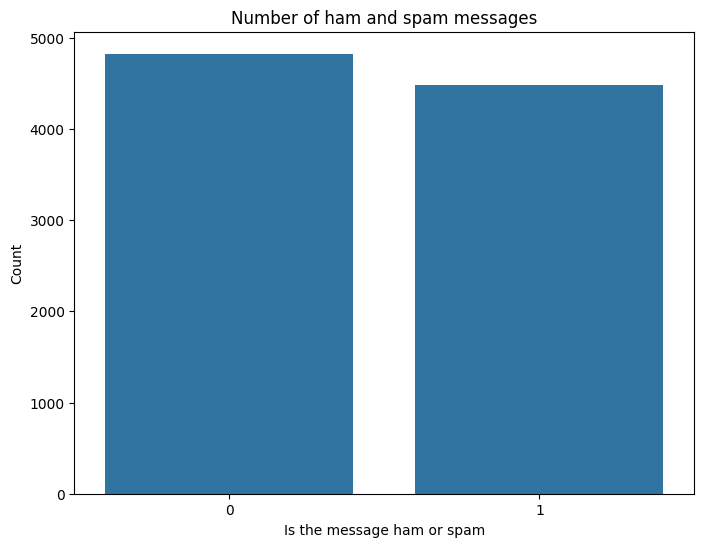

In [12]:
# Count Plot for Ham vs Spam as balancedd Dataset
plt.figure(figsize=(8,6))
sns.countplot(x = 'labels', data = dataset)
plt.title('Number of ham and spam messages')
plt.xlabel('Is the message ham or spam')
plt.ylabel('Count')
plt.show()

In [13]:
dataset['wordcount'] = dataset['message'].apply(lambda x: len(x.split()))
dataset.head()

,labels,message,wordcount
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


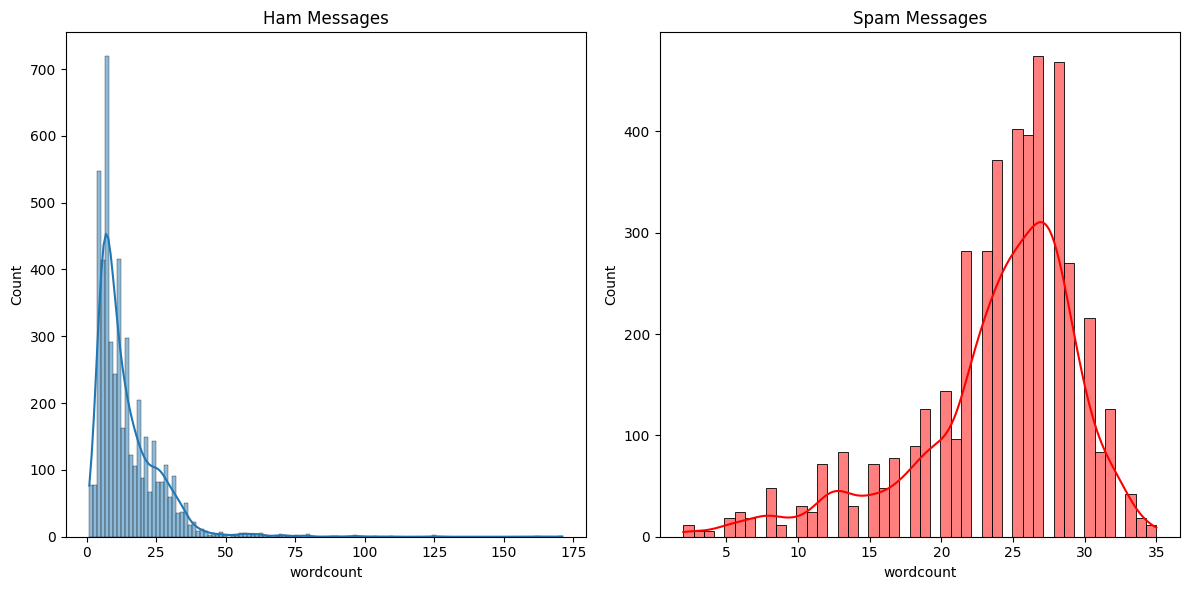

In [14]:
plt.figure(figsize = (12,6))

# (1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['labels'] == 0].wordcount, kde = True)
p = plt.title('Ham Messages')

# (1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['labels'] == 1].wordcount, color = 'red',kde = True)
p = plt.title('Spam Messages')

plt.tight_layout()
plt.show()

In [15]:
# Creating new feature of containing currency symbols
def currency(data):
  currency_symbols = ['$', '€','₹','¥','£']
  for i in currency_symbols:
    if i in data:
      return 1
  return 0

In [16]:
dataset['contains_currency_symbols'] = dataset['message'].apply(currency)
dataset.head()

,labels,message,wordcount,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0


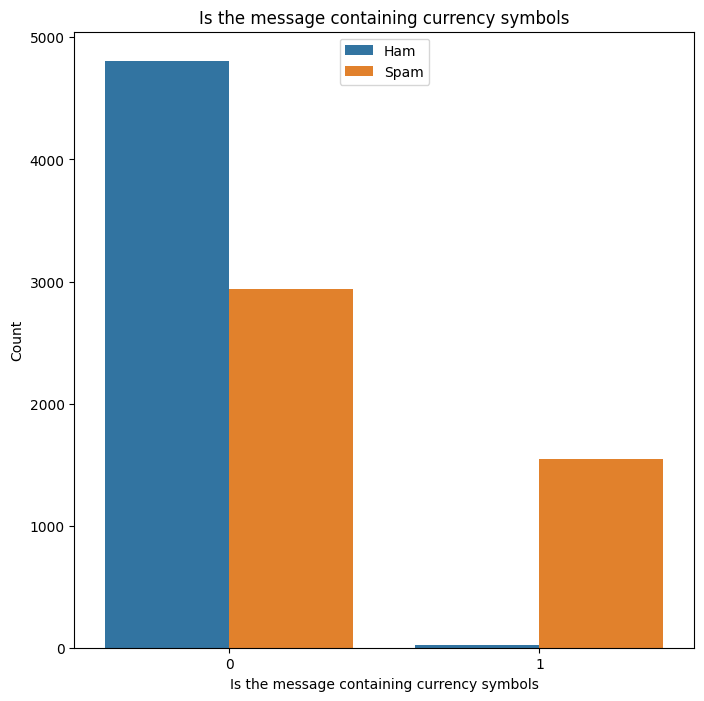

In [17]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'contains_currency_symbols', hue = 'labels', data = dataset)
p = plt.title('Is the message containing currency symbols')
p = plt.xlabel('Is the message containing currency symbols')
p = plt.ylabel('Count')
p = plt.legend(labels = ['Ham', 'Spam'], loc = 9)
plt.show()

In [18]:
# Creating feature for numbers
def numbers(data):
  for i in data:
    if ord(i) >= 48 and ord(i) <= 57:
      return 1
  return 0

In [19]:
dataset['contains_numbers'] = dataset['message'].apply(numbers)
dataset.head()

,labels,message,wordcount,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


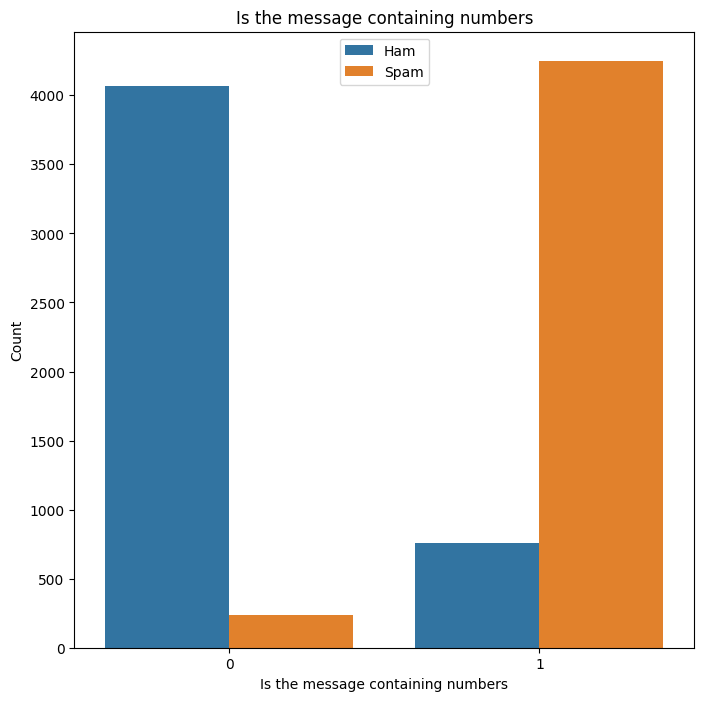

In [20]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'contains_numbers', hue = 'labels', data = dataset)
p = plt.title('Is the message containing numbers')
p = plt.xlabel('Is the message containing numbers')
p = plt.ylabel('Count')
p = plt.legend(labels = ['Ham', 'Spam'], loc = 9)
plt.show()

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
import re

In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
  message = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = sms)
  message = message.lower()
  words = message.split()
  filtered_word = [word for word in words if word not in stopwords.words('english')]
  lem_word = [wnl.lemmatize(word) for word in filtered_word]
  message = ' '.join(lem_word)
  corpus.append(message)

In [48]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [25]:
# Creating the Bag of Words model
import sklearn

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [27]:
X = pd.DataFrame(vectors, columns = feature_names)
Y = dataset['labels']

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.343368,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
cv = cross_val_score(estimator = model, X = X_train, y = Y_train,scoring = 'f1', cv = 10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.941
0.009


In [44]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [45]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [46]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[905,  54],
       [ 56, 847]])

Text(70.72222222222221, 0.5, 'Actual Values')

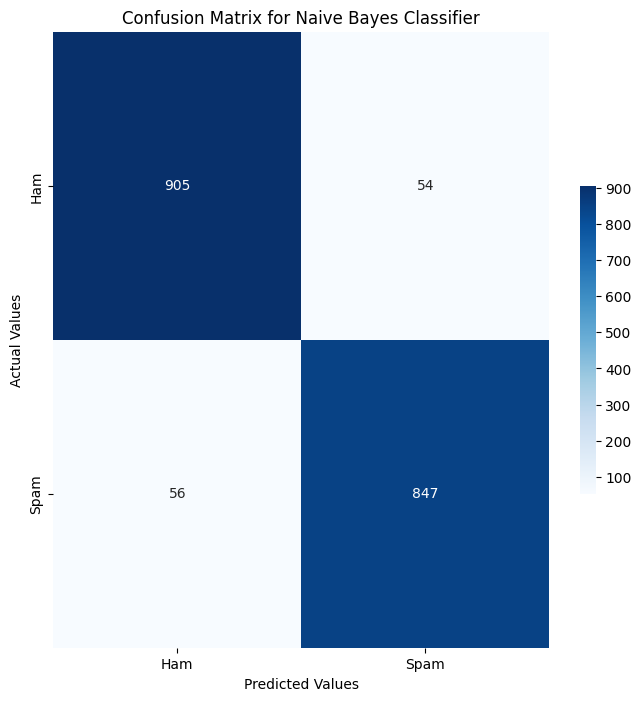

In [47]:
plt.figure(figsize = (8,8))
axis_labels = ['Ham','Spam']
sns.heatmap(cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g',cmap = 'Blues', cbar_kws = {'shrink' : 0.5})
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(estimator = dt, X = X_train, y = Y_train,scoring = 'f1', cv = 10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.977
0.005


In [49]:
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

In [50]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [51]:
cm1 = confusion_matrix(Y_test, Y_pred)
cm1

array([[931,  28],
       [  4, 899]])

Text(70.72222222222221, 0.5, 'Actual Values')

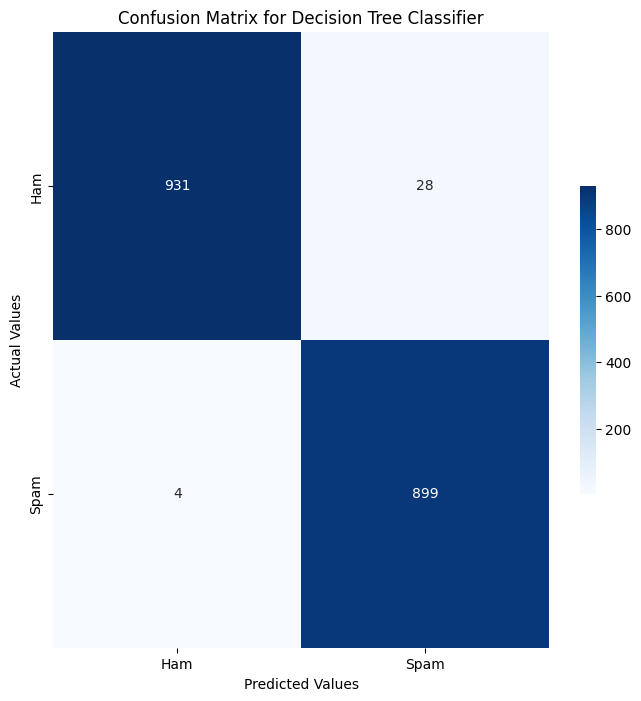

In [52]:
plt.figure(figsize = (8,8))
axis_labels = ['Ham','Spam']
sns.heatmap(cm1, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g',cmap = 'Blues', cbar_kws = {'shrink' : 0.5})
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [55]:
def predict_spam(sms):
    message = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = sms)
    message = message.lower()
    words = message.split()
    filtered_word = [word for word in words if word not in stopwords.words('english')]
    lem_word = [wnl.lemmatize(word) for word in filtered_word]
    message = ' '.join(lem_word)
    temp = tfidf.transform([message]).toarray()
    if model.predict(temp) == 0:
      print('Ham')
    else:
      print('Spam')

In [56]:
# Prediction 1
sample = 'Hi, how are you?'
predict_spam(sample)

Ham


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [57]:
# Prediction 2
sample = 'Free entry in 2 a wkly comp to win FA Cup final'
predict_spam(sample)

Spam


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
